In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from gensim.corpora.dictionary import Dictionary
from nltk import word_tokenize
%matplotlib inline

In [2]:
all_english_corpus = ["ausaid-3083.en", "bbc-468.en", "odb-9826.en", "SMERU-26870.en"]
all_indo_corpus = ["ausaid-3083.id", "bbc-468.id", "odb-9826.id", "SMERU-26870.id"]

In [3]:
concatenated_df = None

for itr in range(len(all_english_corpus)):
    english_corpus_name = all_english_corpus[itr]
    indo_corpus_name = all_indo_corpus[itr]
    
    eng_text_df, indo_text_df = None, None
    
    with open("./corpus/" + english_corpus_name) as fp:
        eng_text = fp.read()
        eng_text = eng_text.splitlines()
        eng_text_df = pd.DataFrame(eng_text)
        eng_text_df = eng_text_df.rename(columns={0:'English'})
        #print(eng_text_df.head())
        # df_eng_text = df_eng_text.rename(columns={0:'English'})
        
    with open("./corpus/" + indo_corpus_name) as fp:
        indo_text = fp.read()
        indo_text = indo_text.splitlines()
        indo_text_df = pd.DataFrame(indo_text)
        indo_text_df = indo_text_df.rename(columns={0:'Indonesian'})
        #print(indo_text_df.head())
        # df_eng_text = df_eng_text.rename(columns={0:'English'})   
        
    eng_text_df['English'] = eng_text_df['English'].apply(lambda x : x.lstrip())
    indo_text_df['Indonesian'] = indo_text_df['Indonesian'].apply(lambda x : x.lstrip())
    
    # Merge the English and Indo datasets
    df = pd.concat([eng_text_df, indo_text_df], axis=1)
    
    print("Number of rows for {0} is {1}".format(english_corpus_name, df.shape[0]))
    
    # merge the different datasets
    concatenated_df = pd.concat([concatenated_df, df], axis = 0)
    #print(df.head())

Number of rows for ausaid-3083.en is 3112
Number of rows for bbc-468.en is 468
Number of rows for odb-9826.en is 9823
Number of rows for SMERU-26870.en is 26966


In [4]:
concatenated_df.head()

,English,Indonesian
0,Introduction: 2007 year in review,Pendahuluan: Tahun peninjauan 2007
1,2007 was another significant year for the Aust...,2007 kembali menjadi tahun yang signifikan bag...
2,Reconstruction after the 2004 Boxing Day tsuna...,Rekonstruksi yang dilakukan setelah terjadinya...
3,This work was the centrepiece of the $1 billio...,Ini merupakan pekerjaan inti dari Kemitraan Au...
4,AIPRD also includes large-scale social and eco...,AIPRD juga mencakup program pengembangan ekono...


In [5]:
concatenated_df.shape

(40369, 2)

In [6]:
concatenated_df.tail()

,English,Indonesian
26961,Some of the respondents gave more than one sug...,Beberapa di antara responden memberi saran leb...
26962,Table 5 shows the kinds of suggestions conveye...,Jenis saran yang disampaikan responden berdasa...
26963,Some of the suggestions given by the responden...,Beberapa saran yang disampaikan oleh responden...
26964,"However, the suggestion regarding the updating...",Akan tetapi saran tentang updating yang disamp...
26965,The next available data on the population cens...,"Data sensus penduduk, misalnya, baru dapat dip..."


In [15]:
# concatenated_df.to_csv("./corpus/combined.csv", index=False)

In [7]:
concatenated_df["English_num_words"] = concatenated_df["English"].apply(str.lower).apply(word_tokenize).apply(len)
concatenated_df["English_num_words"].head()

0     6
1    11
2    23
3    32
4    12
Name: English_num_words, dtype: int64

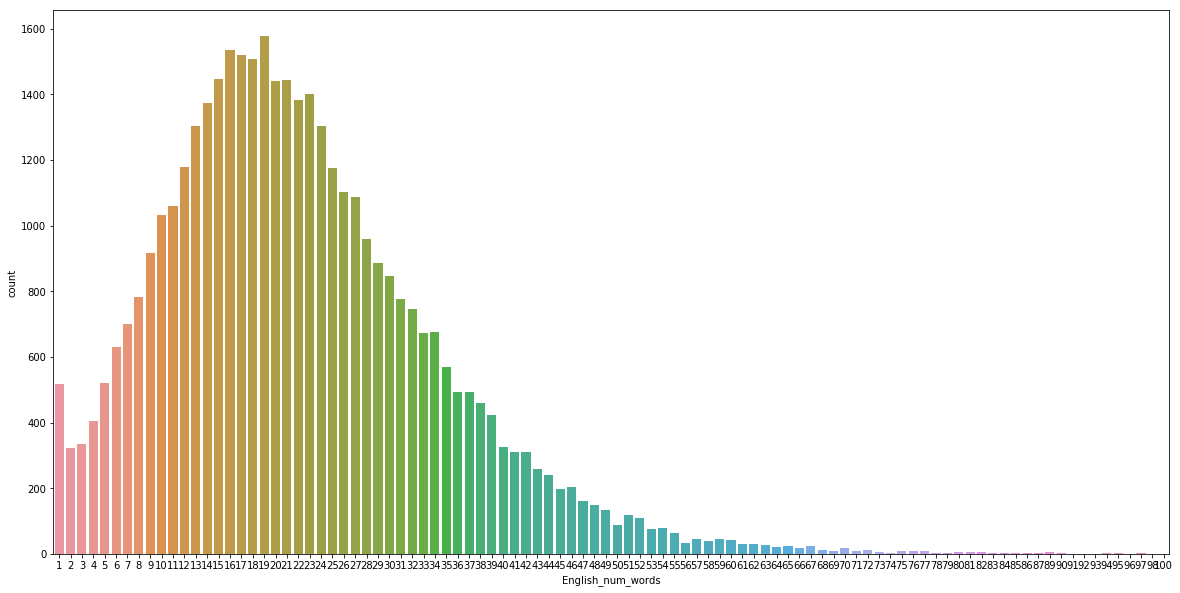

In [10]:
plt.rcParams["figure.figsize"] = (20,10)
import seaborn as sns
sns.countplot(x="English_num_words", data=concatenated_df)

In [11]:
concatenated_df["Indo_num_words"] = concatenated_df["Indonesian"].apply(str.lower).apply(word_tokenize).apply(len)
concatenated_df["Indo_num_words"].head()

0     5
1    11
2    25
3    27
4    13
Name: Indo_num_words, dtype: int64

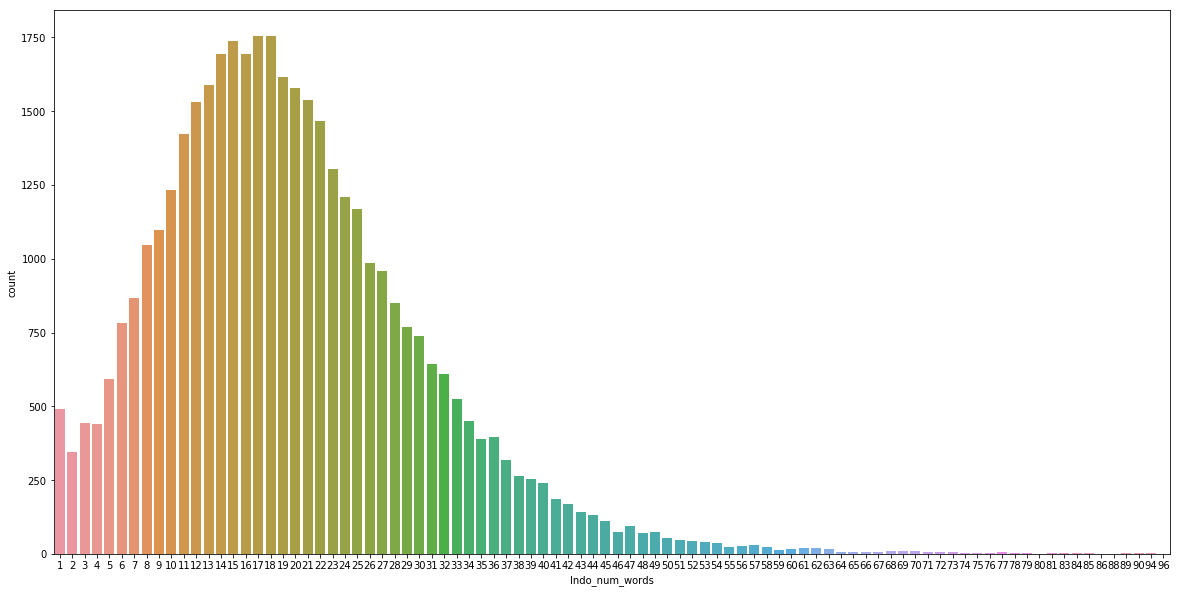

In [12]:
import seaborn as sns
sns.countplot(x="Indo_num_words", data=concatenated_df)

In [17]:
above_78 = concatenated_df[concatenated_df["English_num_words"]>78]["English_num_words"].count()
above_78

61

In [19]:
above_78_indo_df = concatenated_df[concatenated_df["Indo_num_words"]>78]
above_78_indo_df.head()
above_78_indo_df.shape

(27, 4)

In [20]:
overall_above_78 = concatenated_df[(concatenated_df["Indo_num_words"]>78) | (concatenated_df["English_num_words"]>78)]
overall_above_78.head()

,English,Indonesian,English_num_words,Indo_num_words
458,"AusAID developed programs in health, education...",AusAID mengembangkan berbagai program di bidan...,85,83
735,Following an Indonesian Government allocation ...,Sehubungan dengan alokasi dana dari Pemerintah...,80,76
1052,Indonesia’s National Access to Justice Strateg...,Strategi Nasional Indonesia untuk Akses terhad...,95,96
1376,Donors are not being asked to contribute to di...,Para donor tidak diminta untuk memberikan kont...,98,89
1899,The ISP will be reimbursed for costs including...,"ISP akan direimburse untuk biaya, termasuk nam...",86,81


In [21]:
overall_above_78.shape

(67, 4)

In [22]:
trimmed_concatenated_df = concatenated_df[(concatenated_df["Indo_num_words"]<=78) & (concatenated_df["English_num_words"]<=78)]
trimmed_concatenated_df.head()

,English,Indonesian,English_num_words,Indo_num_words
0,Introduction: 2007 year in review,Pendahuluan: Tahun peninjauan 2007,6,5
1,2007 was another significant year for the Aust...,2007 kembali menjadi tahun yang signifikan bag...,11,11
2,Reconstruction after the 2004 Boxing Day tsuna...,Rekonstruksi yang dilakukan setelah terjadinya...,23,25
3,This work was the centrepiece of the $1 billio...,Ini merupakan pekerjaan inti dari Kemitraan Au...,32,27
4,AIPRD also includes large-scale social and eco...,AIPRD juga mencakup program pengembangan ekono...,12,13


In [23]:
trimmed_concatenated_df.shape

(40302, 4)

## The below is the combined dataset where the number of words for English and Indonesian are less than or equal to 78

In [24]:
trimmed_concatenated_df.to_csv("./corpus/trimmed_combined.csv", index=False)

In [3]:
data = pd.read_csv('./corpus/trimmed_combined.csv')

In [5]:
print(data.head())
print(data.shape)

                                             English  \
0                 Introduction: 2007 year in review    
1  2007 was another significant year for the Aust...   
2  Reconstruction after the 2004 Boxing Day tsuna...   
3  This work was the centrepiece of the $1 billio...   
4  AIPRD also includes large-scale social and eco...   

                                          Indonesian  English_num_words  \
0                Pendahuluan: Tahun peninjauan 2007                   6   
1  2007 kembali menjadi tahun yang signifikan bag...                 11   
2  Rekonstruksi yang dilakukan setelah terjadinya...                 23   
3  Ini merupakan pekerjaan inti dari Kemitraan Au...                 32   
4  AIPRD juga mencakup program pengembangan ekono...                 12   

   Indo_num_words  
0               5  
1              11  
2              25  
3              27  
4              13  
(40302, 4)


In [6]:
#From our initial Data Exploration, it is noted that we have found duplicates in the corupus.
#As such, we have removed them by dropping the duplicates using the Pandas fucntion.

data.drop_duplicates(subset ="English", 
                     keep = False, inplace = True)

In [7]:
print(data.shape)

(39232, 4)


In [8]:
data.to_csv("./corpus/trimmed_combined_no_duplicate.csv", index=False)